In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [2]:
class_names = ['abir', 'bobi', 'empty', 'rafi', 'unknown']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (224, 224)

In [3]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = [r'D:\datasets\train', r'D:\datasets\validation']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

  0%|          | 14/8278 [00:00<01:03, 130.00it/s]

Loading D:\datasets\train


  0%|          | 12/3016 [00:00<00:25, 116.82it/s]

Loading D:\datasets\validation


100%|██████████| 833/833 [00:17<00:00, 48.94it/s] 


In [5]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [6]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 29978
Number of testing examples: 9788
Each image is of size: (224, 224)


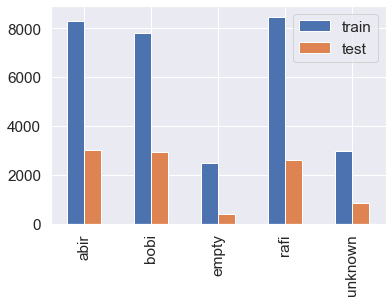

In [7]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()


In [8]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [9]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

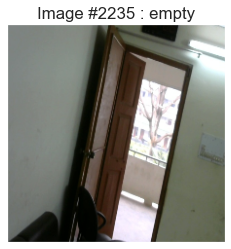

In [10]:
display_random_image(class_names, train_images, train_labels)

In [11]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()
    

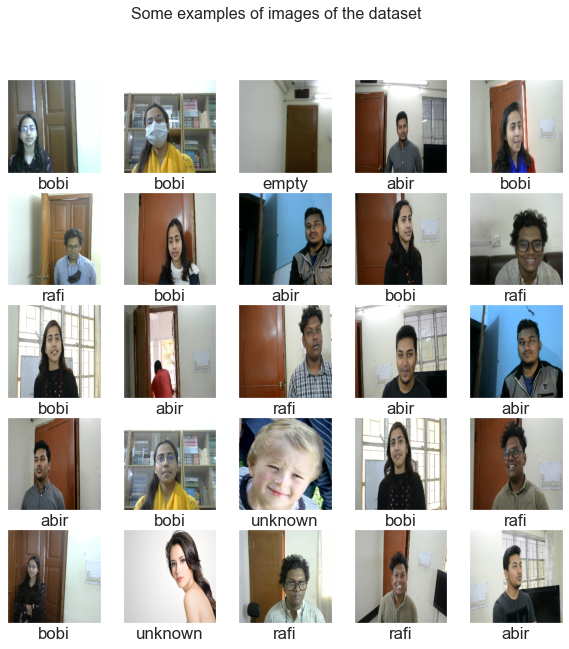

In [12]:
display_examples(class_names, train_images, train_labels)

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (224, 224, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dropout(.4),
    tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])

In [14]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Train on 23982 samples, validate on 5996 samples
Epoch 1/20
23982/23982 [==============================] - 30s 1ms/sample - loss: 0.3997 - accuracy: 0.8533 - val_loss: 0.0740 - val_accuracy: 0.9741
Epoch 2/20
23982/23982 [==============================] - 25s 1ms/sample - loss: 0.0429 - accuracy: 0.9876 - val_loss: 0.0209 - val_accuracy: 0.9932
Epoch 3/20
23982/23982 [==============================] - 25s 1ms/sample - loss: 0.0240 - accuracy: 0.9929 - val_loss: 0.0800 - val_accuracy: 0.9765
Epoch 4/20
23982/23982 [==============================] - 25s 1ms/sample - loss: 0.0190 - accuracy: 0.9933 - val_loss: 0.0242 - val_accuracy: 0.9930
Epoch 5/20
23982/23982 [==============================] - 25s 1ms/sample - loss: 0.0109 - accuracy: 0.9968 - val_loss: 0.0138 - val_accuracy: 0.9958
Epoch 6/20
23982/23982 [==============================] - 25s 1ms/sample - loss: 0.0141 - accuracy: 0.9960 - val_loss: 0.0505 - val_accuracy: 0.9830
Epoch 7/20
23982/23982 [==============================] -

In [16]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

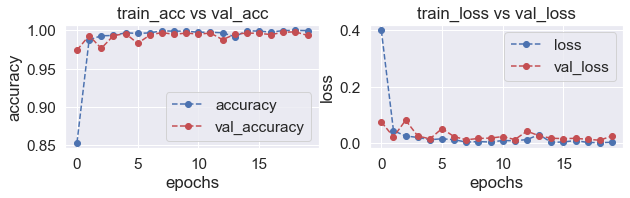

In [17]:
plot_accuracy_loss(history)


In [18]:
test_loss = model.evaluate(test_images, test_labels)


9788/9788 [==============================] - 6s 622us/sample - loss: 0.2525 - accuracy: 0.9632


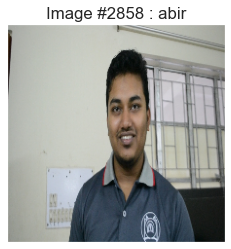

In [22]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

In [23]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

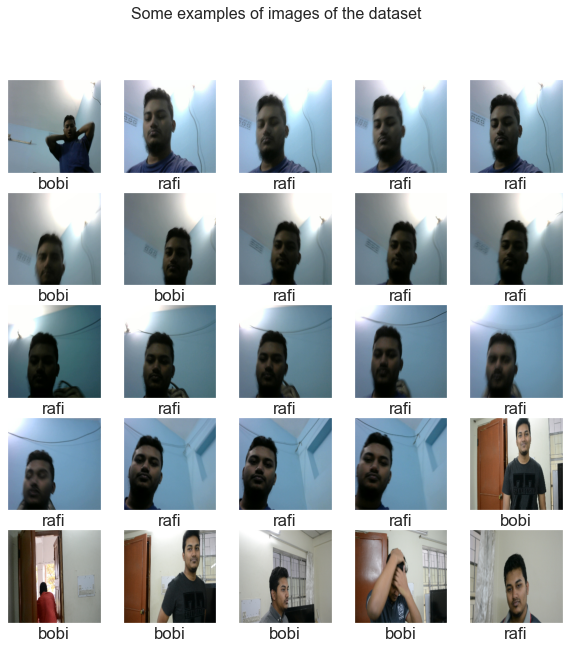

In [24]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)


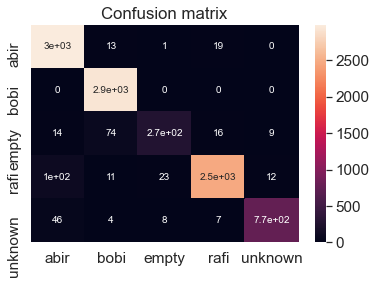

In [25]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [26]:
model_json = model.to_json()
with open("vgg19-val.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("vgg19-val.h5")
print("Saved model to disk")

Saved model to disk


In [23]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

Using TensorFlow backend.


In [43]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

In [44]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
numFeatures = x * y * z

In [45]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)

X = train_features.reshape((n_train, x*y*z))
pca.fit(X)

C = pca.transform(X) # Représentation des individus dans les nouveaux axe
C1 = C[:,0]
C2 = C[:,1]

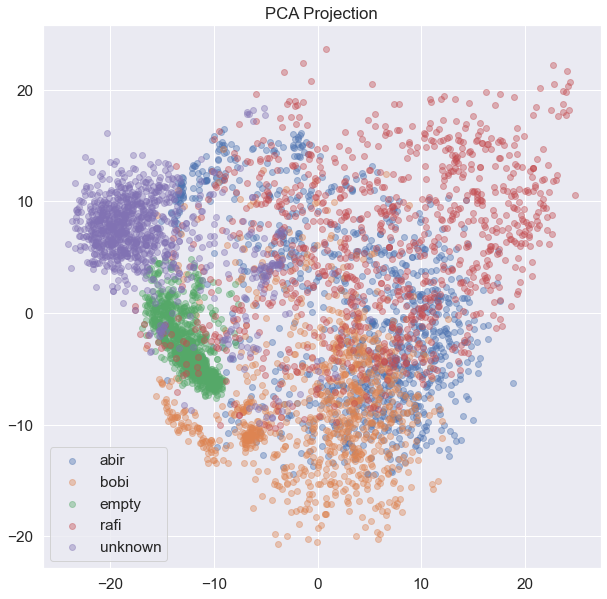

In [46]:
### Figures

plt.subplots(figsize=(10,10))

for i, class_name in enumerate(class_names):
    plt.scatter(C1[train_labels == i][:1000], C2[train_labels == i][:1000], label = class_name, alpha=0.4)
plt.legend()
plt.title("PCA Projection")
plt.show()

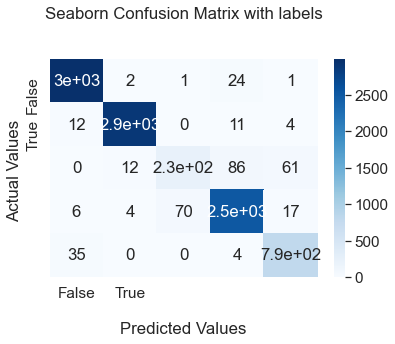

In [29]:
import seaborn as sns

ax = sns.heatmap(confusion_matrix(test_labels, pred_labels), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(test_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3016
           1       0.99      0.99      0.99      2929
           2       0.76      0.59      0.66       387
           3       0.95      0.96      0.96      2623
           4       0.91      0.95      0.93       833

    accuracy                           0.96      9788
   macro avg       0.92      0.90      0.91      9788
weighted avg       0.96      0.96      0.96      9788

